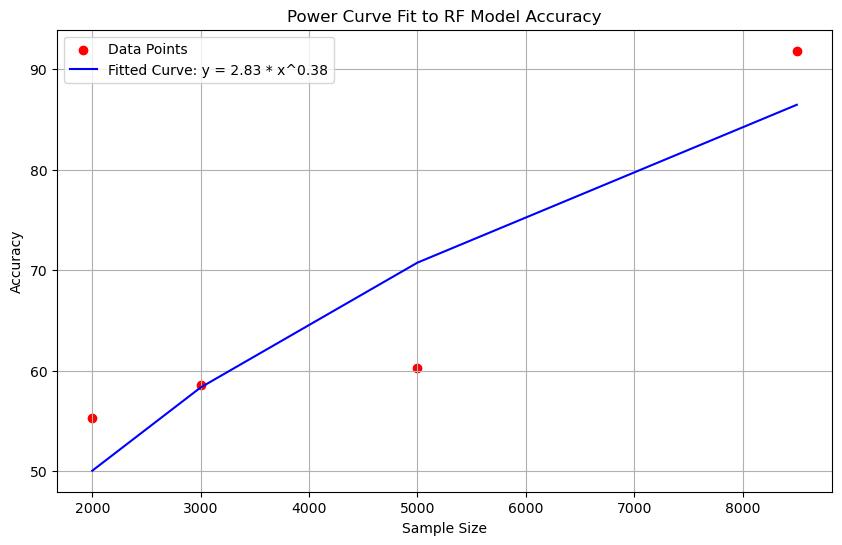

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample sizes and corresponding accuracies for RF
sample_sizes = np.array([2000, 3000, 5000, 8500])
accuracies = np.array([55.26, 58.6, 60.28, 91.85])  # Using mean values

# Defining the power function to fit
def power_curve(x, a, b):
    return a * np.power(x, b)

# Fit the power curve
params, covariance = curve_fit(power_curve, sample_sizes, accuracies)

# Plotting the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(sample_sizes, accuracies, color='red', label='Data Points')
fitted_values = power_curve(sample_sizes, *params)
plt.plot(sample_sizes, fitted_values, color='blue', label=f'Fitted Curve: y = {params[0]:.2f} * x^{params[1]:.2f}')
plt.title('Power Curve Fit to RF Model Accuracy')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


POWER CURVE FOR ALL MODELS.

C:\Users\nikip\AppData\Local\Temp\ipykernel_10672\3230684618.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(sample_sizes, accuracies, color=color, s=41, edgecolors='k', alpha=0.7, marker=marker, label=f'{model} Accuracies')


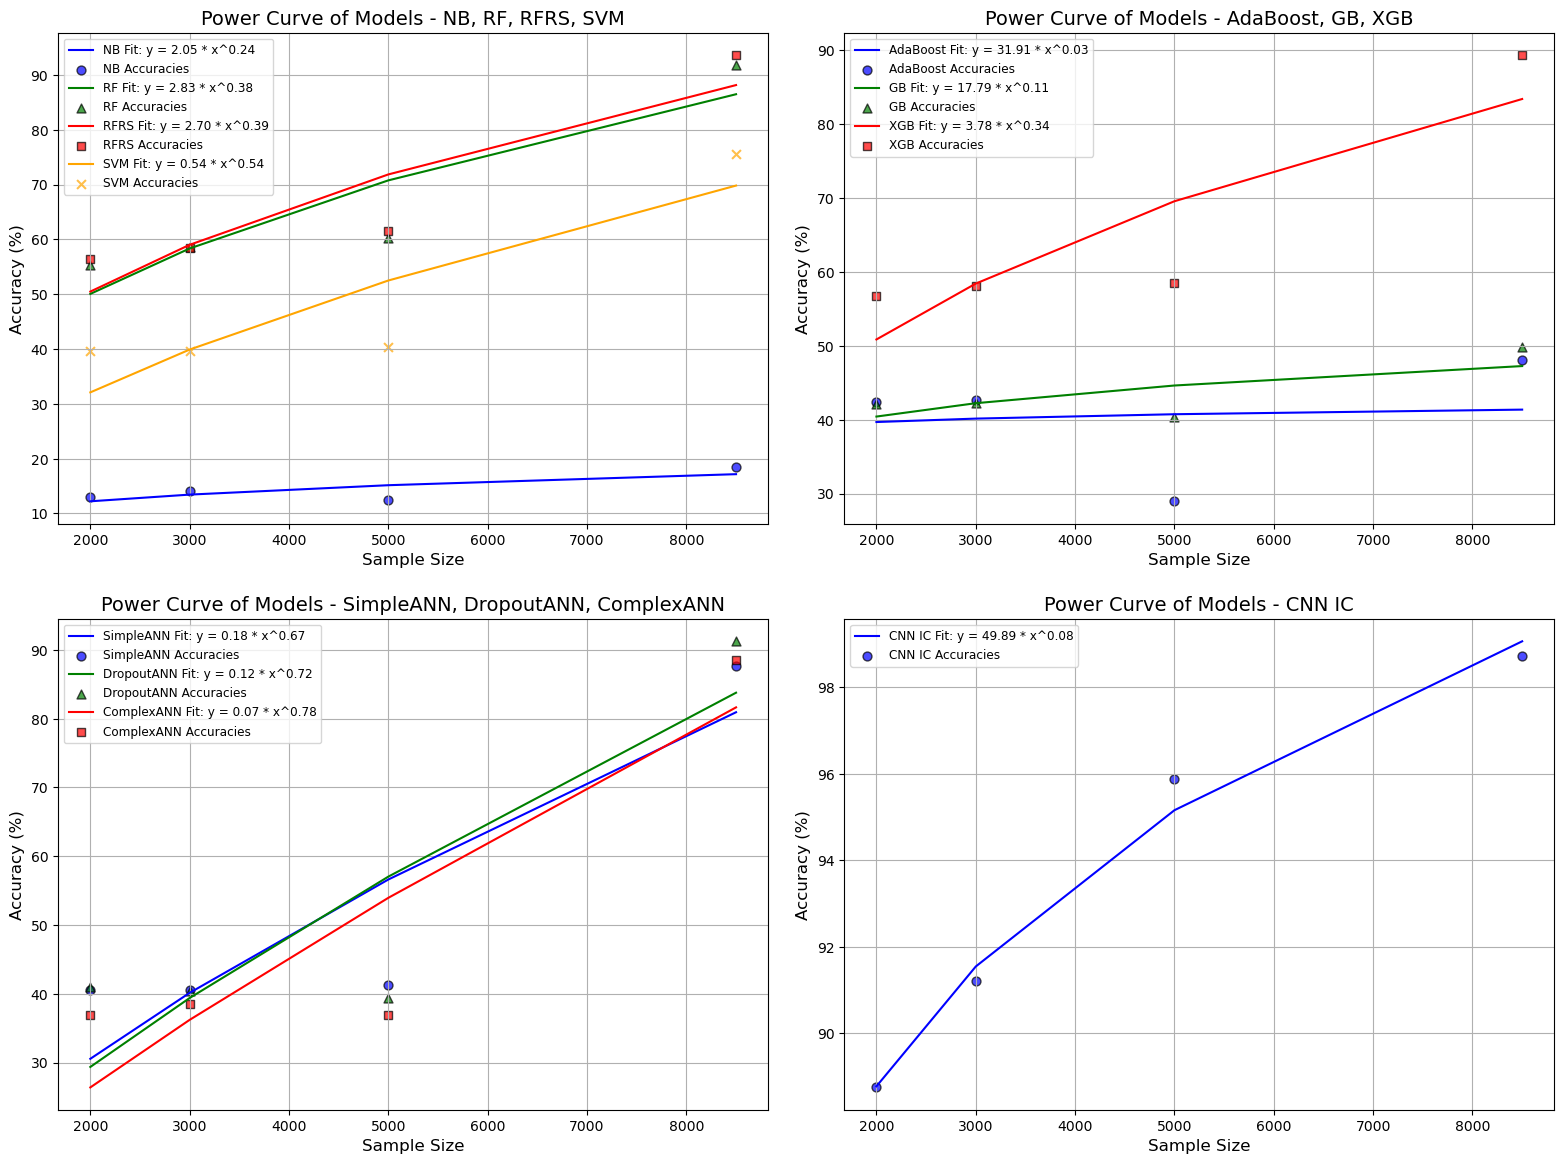

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data for each model
models = {
    "NB": [12.92, 14.06, 12.52, 18.5],
    "RF": [55.26, 58.6, 60.28, 91.85],
    "RFRS": [56.37, 58.41, 61.5, 93.59],
    "SVM": [39.6, 39.62, 40.38, 75.62],
    "AdaBoost": [42.32, 42.59, 28.95, 48.03],
    "GB": [42.17, 42.21, 40.29, 49.83],
    "XGB": [56.69, 58.05, 58.45, 89.29],
    "SimpleANN": [40.56, 40.6, 41.22, 87.68],
    "DropoutANN": [40.98, 40.35, 39.4, 91.24],
    "ComplexANN": [36.95, 38.47, 36.87, 88.5],
    "CNN IC": [88.75, 91.2, 95.88, 98.72]
}
sample_sizes = np.array([2000, 3000, 5000, 8500])

# Groups for plotting
groups = [
    ["NB", "RF", "RFRS", "SVM"],
    ["AdaBoost", "GB", "XGB"],
    ["SimpleANN", "DropoutANN", "ComplexANN"],
    ["CNN IC"]
]

# Define the power function to fit
def power_curve(x, a, b):
    return a * np.power(x, b)

# Setup the plot with aesthetic enhancements
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Colors and markers for each model, cycling through all
markers = ['o', '^', 's', 'x']
colors = ["blue", "green", "red", "orange"]

# Plotting
for ax, group in zip(axes, groups):
    for i, model in enumerate(group):
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        accuracies = np.array(models[model])
        params, cov = curve_fit(power_curve, sample_sizes, accuracies, maxfev=20000)
        a, b = params
        fitted_values = power_curve(sample_sizes, *params)
        label_fit = f'{model} Fit: y = {a:.2f} * x^{b:.2f}'
        ax.plot(sample_sizes, fitted_values, label=label_fit, linestyle='-', color=color)
        ax.scatter(sample_sizes, accuracies, color=color, s=41, edgecolors='k', alpha=0.7, marker=marker, label=f'{model} Accuracies')
        ax.set_title(f'Power Curve of Models - {", ".join(group)}', fontsize=14)
        ax.set_xlabel('Sample Size', fontsize=12)
        ax.set_ylabel('Accuracy (%)', fontsize=12)
        ax.legend(fontsize=8.7)
        ax.grid(True)

# Adjust layout and spacing
plt.tight_layout(pad=2.0)
plt.show()